In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky
import os

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=21), plt.rc('ytick', labelsize=21)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

#### load in catalogs

In [2]:
cat = Table.read('new_radial_dist_2023/central_cat/isolated_COSMOS_deep_3.0_11.3_0.4_massive.positions.fits')


In [3]:
cat.info

<Table length=230>
        name          dtype 
-------------------- -------
                  ID   int64
                  RA float64
                 DEC float64
    MASS_MED_massrun float64
                Z_ML float64
sfq_nuvrk_myrun_free float64
               n_sat float64
               n_bkg float64

#### statistics

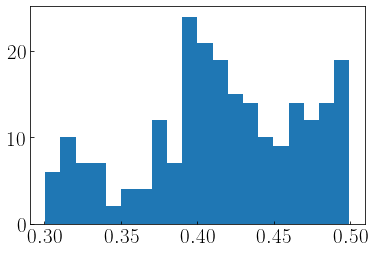

In [7]:
plt.hist(cat['Z_ML'],bins=20)
plt.show()


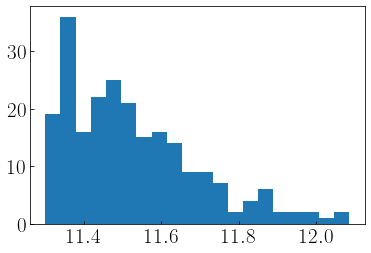

In [6]:
plt.hist(cat['MASS_MED_massrun'],bins=20)
plt.show()


In [11]:
# q-fraction as a funciton of redshift
for z in [0.4,0.6,0.8,1.0,1.2,1.4]:
    cat = Table.read('new_radial_dist_2023/central_cat/isolated_COSMOS_deep_3.0_11.3_'+str(z)+'_massive.positions.fits')
    cat_q = cat[cat['sfq_nuvrk_myrun_free']==0]
    print(z,round(len(cat_q)/len(cat),3))

0.4 0.8
0.6 0.691
0.8 0.743
1.0 0.556
1.2 0.634
1.4 0.42


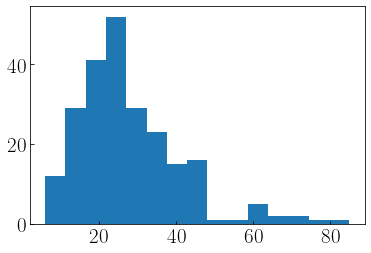

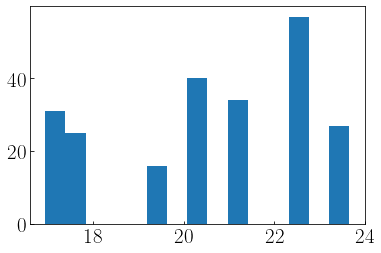

In [4]:
cat = Table.read('new_radial_dist_2023/central_cat/isolated_COSMOS_deep_3.0_11.3_0.4_massive.positions.fits')

# n_sat distribution
plt.hist(cat['n_sat'],bins=15)
plt.show()

# n_bkg distribution
plt.hist(cat['n_bkg'],bins=15)
plt.show()


In [6]:

min(cat['n_bkg'])


16.93548387096774